<a href="https://colab.research.google.com/github/JonathanJuradoS/Planificacion_Heuristica/blob/main/Caso4_Horarios_Academicos_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🏫 Caso 4: Asignación de Horarios Académicos Universitarios

## 📄 Descripción
La coordinación académica de una universidad necesita asignar **docentes**, **cursos** y **aulas** en horarios semanales.  
El sistema debe evitar **solapamientos** y minimizar **vacíos innecesarios**, asegurando una planificación eficiente.

## 🎯 Objetivo
Generar un **horario funcional** que:
- Evite conflictos de asignación.
- Maximice el uso de recursos (aulas y tiempos).

## 📌 Actividad del Estudiante
- Representar el problema como un **espacio de estados**.
- Aplicar el algoritmo **Greedy Best-First Search**.
- Diseñar una heurística que **minimice conflictos y huecos**.
- Evaluar la calidad de la planificación resultante.


In [1]:

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(42)
np.random.seed(42)

# Simular datos
docentes = ["D1", "D2", "D3"]
cursos = ["C1", "C2", "C3"]
aulas = ["A1", "A2"]
dias = ["Lun", "Mar", "Mie", "Jue", "Vie"]
horas = ["8-10", "10-12", "2-4", "4-6"]
slots = [(d, h) for d in dias for h in horas]

# Estado inicial vacío
horario = pd.DataFrame(columns=["Docente", "Curso", "Aula", "Día", "Hora"])



## 🤖 Algoritmo: Greedy Best-First Search

Selecciona las asignaciones más prometedoras primero según una **heurística**.  
La heurística se basa en:
- Disponibilidad del docente y aula.
- Evitar solapamientos y vacíos.


In [2]:

def generar_asignaciones_posibles():
    posibles = []
    for d in docentes:
        for c in cursos:
            for a in aulas:
                for dia, hora in slots:
                    posibles.append((d, c, a, dia, hora))
    return posibles

def heuristica(asignacion, horario):
    d, c, a, dia, hora = asignacion
    conflictos = horario[
        ((horario.Docente == d) | (horario.Aula == a)) &
        (horario.Día == dia) & (horario.Hora == hora)
    ]
    return len(conflictos)

def greedy_horario():
    posibles = generar_asignaciones_posibles()
    random.shuffle(posibles)
    horario = pd.DataFrame(columns=["Docente", "Curso", "Aula", "Día", "Hora"])
    usados = set()

    for asignacion in posibles:
        if (asignacion[0], asignacion[1]) in usados:
            continue
        if heuristica(asignacion, horario) == 0:
            horario.loc[len(horario)] = asignacion
            usados.add((asignacion[0], asignacion[1]))
        if len(usados) == len(docentes) * len(cursos):
            break
    return horario

horario_final = greedy_horario()
horario_final.sort_values(by=["Día", "Hora"])


,Docente,Curso,Aula,Día,Hora
3,D3,C1,A1,Jue,10-12
8,D1,C1,A2,Jue,2-4
7,D3,C2,A1,Jue,8-10
6,D1,C2,A2,Mar,2-4
1,D1,C3,A1,Mie,2-4
0,D2,C2,A1,Mie,4-6
4,D3,C3,A1,Mie,8-10
2,D2,C3,A2,Vie,2-4
5,D2,C1,A2,Vie,8-10


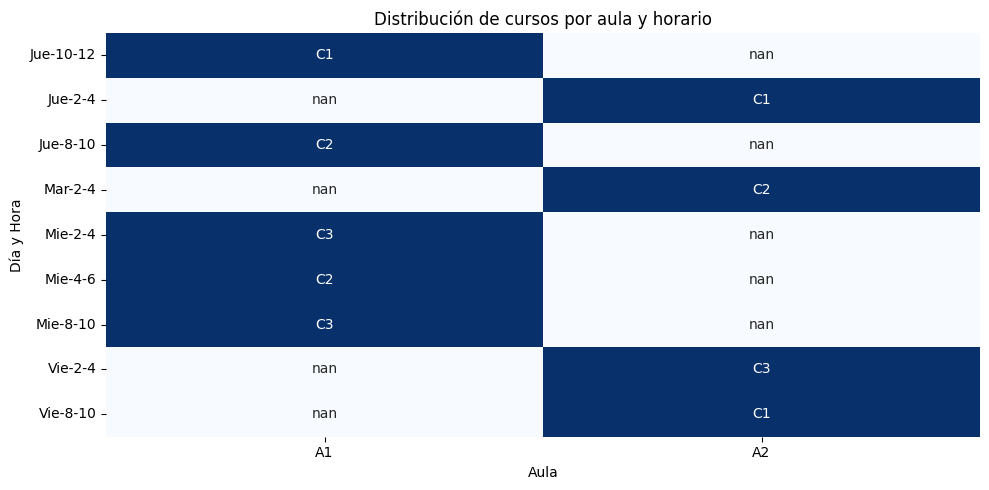

In [3]:

plt.figure(figsize=(10, 5))
pivot = horario_final.pivot_table(index=["Día", "Hora"], columns="Aula", values="Curso", aggfunc='first')
sns.heatmap(pivot.notnull(), annot=pivot, fmt='', cmap='Blues', cbar=False)
plt.title("Distribución de cursos por aula y horario")
plt.ylabel("Día y Hora")
plt.xlabel("Aula")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



## ✅ Conclusiones

- El algoritmo **Greedy Best-First Search** permite generar un horario factible rápidamente priorizando asignaciones sin conflicto.
- La **heurística basada en disponibilidad** y **conflictos mínimos** permitió evitar choques entre docentes y uso de aulas.
- Aunque no se garantiza la solución óptima, el modelo **genera soluciones eficientes en menor tiempo**, ideal para instituciones con recursos limitados o cambios frecuentes.
- Puede ser complementado con mejoras como validación de carga horaria y preferencias docentes para mayor realismo.

📌 Recomendación: explorar técnicas como A* o Beam Search para planificación más completa.
